In [156]:
import numpy as np
from best_arm_algos import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

def compute_h1(means):
    return np.sum(np.array((sorted(means)[:len(means)-1] - np.max(means)))**(-2))

def compute_arm_probabilities(samples, n_arms):
    proba_table = np.zeros(shape = (len(samples) - n_arms, n_arms))
    for t in range(len(samples)-n_arms):
        for i in range(t,t+n_arms - 1):
            proba_table[t,samples[i]]+=1
        proba_table[t,:]*= (1/n_arms)
    return proba_table

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [221]:
means = [1,4/5,3/5,2/5,1/5,0]
deviations = [np.sqrt(1/4)]*6

samples = ucb(means,deviations,experiment=True)
samples2 = ucb(means,deviations,experiment=True)

In [236]:
table = compute_arm_probabilities(samples,6)

In [234]:
def plot_probabilities(n_runs = 1000,n_steps = 4000,  n_arms = 6):
    tables = np.zeros(shape = (n_runs,n_steps,n_arms))
    for run in range(n_runs):
        tables[run] = compute_arm_probabilities(ucb(means,deviations,experiment=True), n_arms)
    table = np.mean(tables, axis = 0)
    for i in range(n_arms):
        plt.plot(range(n_steps), table[:,i])

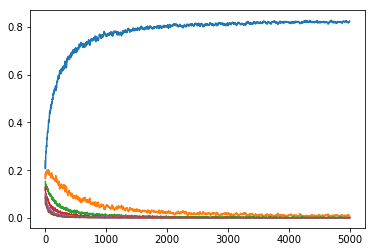

In [235]:
plot_probabilities()